# Protein-Protein-Interaction Network | BINF5800-01 HW

Data Retrieved from Therapeutics Data Commons: https://tdcommons.ai/multi_pred_tasks/ppi/

 All pairwise combinations of human protein-coding genes are systematically being interrogated to identify which are involved in binary protein-protein interactions. In the most recent effort 17,500 proteins have been tested and a first human reference interactome (HuRI) map has been generated. From the Center for Cancer Systems Biology at Dana-Farber Cancer Institute.

Luck, K., Kim, D., Lambourne, L. et al. A reference map of the human binary protein interactome. Nature 580, 402–408 (2020).

In [1]:
import networkx as nx
from tdc.multi_pred import PPI

data=PPI(name = 'HuRI')
df = data.get_data()
df.head()

Downloading...
100%|██████████| 139M/139M [00:30<00:00, 4.49MiB/s] 
Loading...
Done!


,Protein1_ID,Protein1,Protein2_ID,Protein2,Y
0,ENSG00000000005,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,ENSG00000061656,MRRSSRPGSASSSRKHTPNFFSENSSMSITSEDSKGLRSAEPGPGE...,1
1,ENSG00000000005,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,ENSG00000099968,MASSSTVPLGFHYETKYVVLSYLGLLSQEKLQEQHLSSPQGVQLDI...,1
2,ENSG00000000005,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,ENSG00000104765,MSSHLVEPPPPLHNNNNNCEENEQSLPPPAGLNSSWVELPMNSSNG...,1
3,ENSG00000000005,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,ENSG00000105383,MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHP...,1
4,ENSG00000000005,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,ENSG00000114455,MKAQTALSFFLILITSLSGSQGIFPLAFFIYVPMNEQIVIGRLDED...,1


In [2]:
df.describe()

,Y
count,52369.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [3]:
df['Protein1_ID'].describe()

count               52369
unique               6160
top       ENSG00000106511
freq                  402
Name: Protein1_ID, dtype: object

In [4]:
df['Protein1'].describe()

count                                                 52369
unique                                                 6149
top       MEHPLFGCLRSPHATAQGLHPFSQSSLALHGRSDHMSYPELSTSSS...
freq                                                    402
Name: Protein1, dtype: object

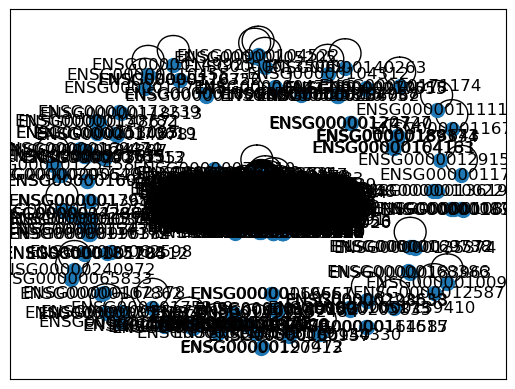

In [6]:
### construct interaction graph ###

protein_interaction_graph = nx.Graph()

#create nodes
#p1_unique = list(set(df['Protein1_ID']))
#p2_unique = list(set(df['Protein2_ID']))
#assert(len(p1_unique)==len(p2_unique)) #check mismatch

#for p in p1_unique:
 #   node = p
  #  sequence = df[df['Protein1_ID']==p]
  #  protein_interaction_graph.add_node(p, sequence=sequence)

#create edges
n1 = [n for n in df['Protein1_ID']]
n2 = [n for n in df['Protein2_ID']]
e = zip(n1,n2)
protein_interaction_graph.add_edges_from(e)

#visualize/sanity check
import matplotlib.pyplot as plt
nx.draw_networkx(protein_interaction_graph, node_size=100)

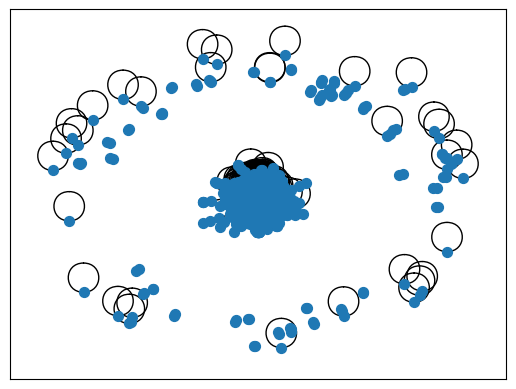

In [7]:
nx.draw_networkx(protein_interaction_graph, node_size=50, with_labels=False)

In [8]:
# find subgraphs
sub_graphs = [protein_interaction_graph.subgraph(g).copy() for g in nx.connected_components(protein_interaction_graph)]
len(sub_graphs)

72

In [9]:
# filter graphs with less than 3 nodes
true_sub_graphs = [g for g in sub_graphs if len(g.edges())>=3]
print(len(true_sub_graphs))


3


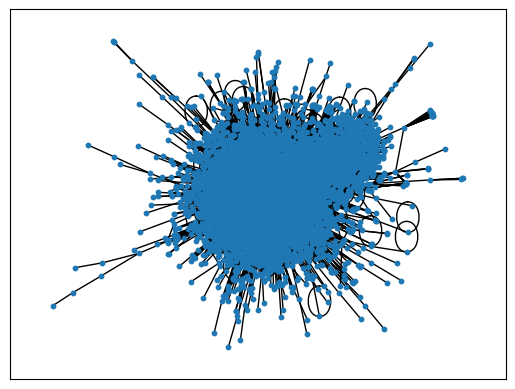

In [10]:
nx.draw_networkx(true_sub_graphs[0], node_size=10, with_labels=False)

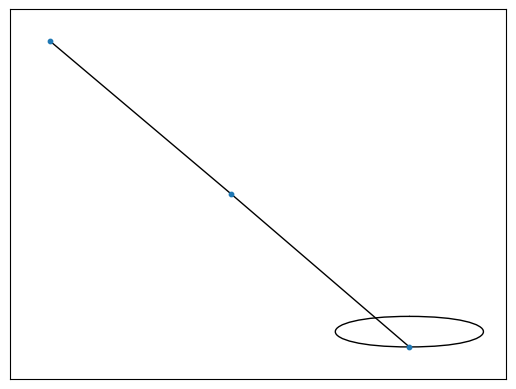

In [11]:
nx.draw_networkx(true_sub_graphs[1], node_size=10, with_labels=False)

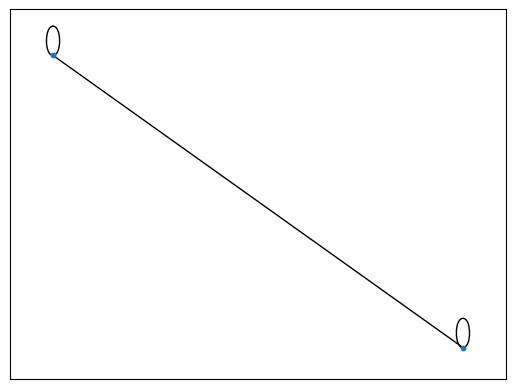

In [12]:
nx.draw_networkx(true_sub_graphs[2], node_size=10, with_labels=False)

### Analyzing the Principal PPI Graph

In [13]:
import numpy as np
import pandas as pd
# node degrees
degree_list = true_sub_graphs[0].degree()
degree_matrix = [[n[0],n[1]] for n in degree_list]
degree_matrix


[['ENSG00000000005', 16],
 ['ENSG00000061656', 22],
 ['ENSG00000099968', 44],
 ['ENSG00000104765', 11],
 ['ENSG00000105383', 16],
 ['ENSG00000114455', 14],
 ['ENSG00000124103', 231],
 ['ENSG00000139637', 31],
 ['ENSG00000150337', 20],
 ['ENSG00000157613', 177],
 ['ENSG00000163472', 31],
 ['ENSG00000167741', 9],
 ['ENSG00000169379', 129],
 ['ENSG00000176171', 55],
 ['ENSG00000181754', 33],
 ['ENSG00000184988', 11],
 ['ENSG00000242019', 22],
 ['ENSG00000000419', 1],
 ['ENSG00000106511', 496],
 ['ENSG00000000457', 4],
 ['ENSG00000034713', 34],
 ['ENSG00000100348', 60],
 ['ENSG00000139112', 33],
 ['ENSG00000198420', 29],
 ['ENSG00000000460', 1],
 ['ENSG00000149380', 44],
 ['ENSG00000001036', 15],
 ['ENSG00000085741', 15],
 ['ENSG00000105576', 35],
 ['ENSG00000105991', 263],
 ['ENSG00000108256', 51],
 ['ENSG00000127445', 99],
 ['ENSG00000138867', 72],
 ['ENSG00000186226', 61],
 ['ENSG00000186844', 69],
 ['ENSG00000187170', 61],
 ['ENSG00000188730', 57],
 ['ENSG00000196224', 43],
 ['ENSG0000

In [20]:
degrees = [i[1] for i in degree_matrix]
degrees = sorted(degrees, reverse=True)
print("max:", max(degrees))
print("min:", min(degrees))

max: 497
min: 1


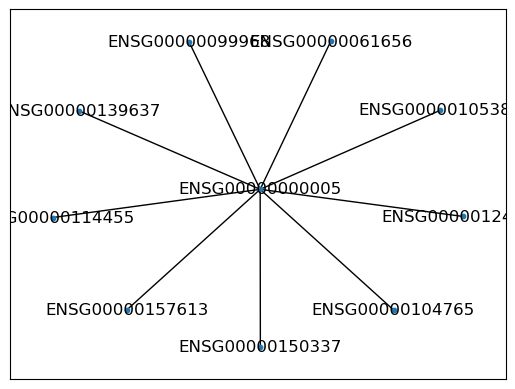

In [25]:
# create subgraph
nodes = [i[0] for i in degree_matrix][:10]
induced_subG = nx.induced_subgraph(true_sub_graphs[0], nodes)
nx.draw_networkx(induced_subG, node_size=10)